# Laboratorio 03: Regresión Lineal y Gradiente Descendente

## Dayana Andrea Henao Arbeláez 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Regresión lineal:

Supongamos que tenemos un sistema en el que existe un predicor con  **m** valores de entrenamiento,  asi:   $ (x^{(1)}, y^{(1)} ) , (x^{(2)}, y^{(2)}) ... (x^{(m)}, y^{(m)})$


|Training|Y  | X_1  |
|--------|---|----------|
|$1$     |$Y^{1}$ | $X_1^{1}$|
|$2$     |$Y^{2}$ | $X_1^{2}$|
|$.$     |$.$     | $.$      |
|$.$     |$.$     | $.$      |
|$.$     |$.$     | $.$      |
|$m$     |$Y^{m}$ | $X_1^{m}$  |



Podemos definir un modelo lineal  como : $h(X) = \theta_0 + \theta_1 X$ con $(\theta_0 , \theta_1)$ parámetros. Nuestro objetivo es encontrar el conjunto de puntos  $(\theta_0 , \theta_1)$ que se encuentan más "cercano" a $Y$ para cada $X$.

Para la optimización, vamos a definir la función de coste **$J(\theta_1,\theta_2 )$** para las muestras de entrenamiento como aquella que garantiza la distancia euclidiana respecto a la hipotesis planteada, así:

\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( h_{\theta} (x^{(i)})-y^{(i)})^2
\end{equation}

Para encontrar los valores  $(\theta_0 , \theta_1)$ se necesita  minimizar la función de coste, que permite obtener los valores más cercanos,  esta minimización podrá ser realizada a través de diferentes métodos el más conocido es el gradiente descendente.

Supongamos un modelo lineal para realizar la predicción, así nuestro modelo estará basado en la siguiente hipotesis de trabajo:

$h(X) =\theta_0 + \theta_1 X$


Reemplando el modelo anterior en la función de coste, tenemos que:



\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( (\theta_0 + \theta_1 x^{(i)})- y^{(i)})^2
\end{equation}


1. Supongamos que un conjunto de características y datos etiquetados estan dados de la siguiente manera:

Crear un data frame de pandas con los siguientes datos:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|

In [2]:
df = pd.DataFrame({"X":[0,1,2,3,4], "Y":[0,1,2,3,4]})
df


,X,Y
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


2. Crear una función para calcular la función de coste.

In [3]:
def J(theta_0, theta_1, X, Y):
    m = len(X)
    costo = (1/(2*m)) * np.sum((theta_0 + theta_1 * X - Y) ** 2)
    return costo

3. Asumiendo que $\theta_0=0$, represente gráficamente la función de costo para diferentes valores de $\theta_1$. Determine el valor mínimo de la función de costo y, con este valor, grafique la ecuación de regresión obtenida sobre los datos del dataframe que ha construido.

In [4]:
def h(theta_0, theta_1, X):
    return theta_0 + theta_1 * X

In [5]:
theta_0=0
theta_1=np.linspace(-10,10,1000)
x=df['X']
y=df['Y']   

costos = [J(theta_0, i, x, y) for i in theta_1]
h = [h(theta_0, theta_1[costos.index(min(costos))], j) for j in x]

theta_1_optimo = theta_1[costos.index(min(costos))]

print("El valor óptimo de theta_1 es:", theta_1_optimo)

El valor óptimo de theta_1 es: 0.9909909909909906


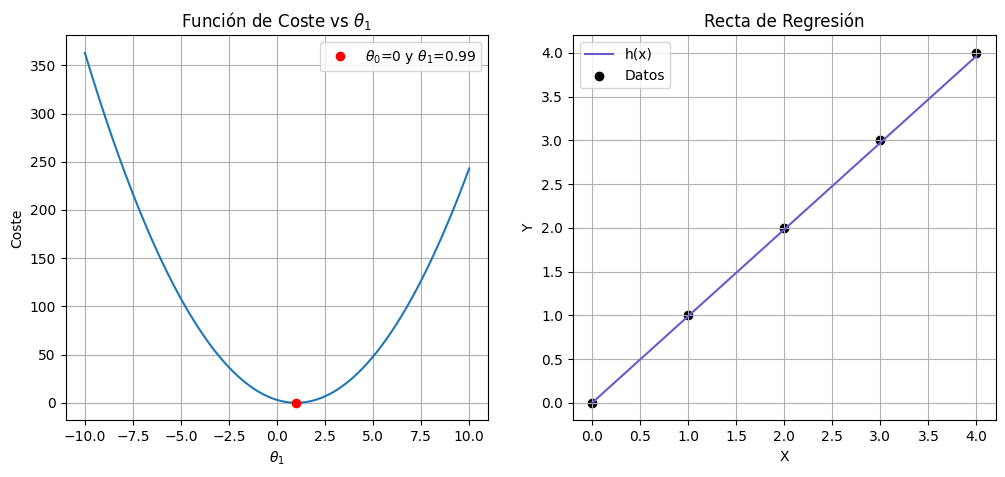

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 
axes[0].plot(theta_1, costos)
axes[0].plot(theta_1[costos.index(min(costos))], min(costos), 'ro', label= f'$θ_0$={0} y $θ_1$={theta_1_optimo:.2}')
axes[0].set_xlabel('$θ_1$')
axes[0].set_ylabel('Coste')
axes[0].set_title('Función de Coste vs $θ_1$')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(x, h, label=f'h(x)', color='slateblue')
axes[1].scatter(x, y, color='black', label='Datos')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].set_title('Recta de Regresión')
axes[1].legend()
axes[1].grid(True)

plt.show()


4. Suponiendo ahora que los datos de entrenamiento viene dados de la siguiente manera:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|

Encontrar la función de coste para diferentes valores de $\theta_0$, $\theta_1$.
Para ello puede emplear los metodos `surface` y `contour` dentro de la libreria de `matplotlib`.  Construya primero, con los valores de $\theta_0$, $\theta_1 $ definidos un `np.meshgrid` y evalue  para cada punto $\theta_0$, $\theta_1$ la función de coste.

Para el gráfico 3D puede emplear algo similar a las siguientes lineas de código

```
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot_surface(t0, t1, J )
ax.contour(t0, t1, J, 200,   linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()
```


En los casos anteriores la solución solo involucra 1 y 2 parámetros para la representación de la función de coste en  2D y 3D respectivamente. Cuando se tienen más parametros a optmizar, no podemos tener una representacion gráfica, análoga a los casos anteriores. Notese además que los datos anteriores no tiene ningún ruido y solo se esta realizados  de esta manera, por motivos didácticos.

In [7]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 2, 3, 4, 5])
m = len(y)


def J(theta_0, theta_1, x, y):
    h = theta_0 + theta_1 * x
    return (1/(2*m)) * np.sum((h - y)**2)


theta_0_vals = np.linspace(-10, 10, 100)
theta_1_vals = np.linspace(-10, 10, 100)


T0, T1 = np.meshgrid(theta_0_vals, theta_1_vals)

J_vals = np.zeros_like(T0)
for i in range(T0.shape[0]):
    for j in range(T0.shape[1]):
        J_vals[i, j] = J(T0[i, j], T1[i, j], x, y)

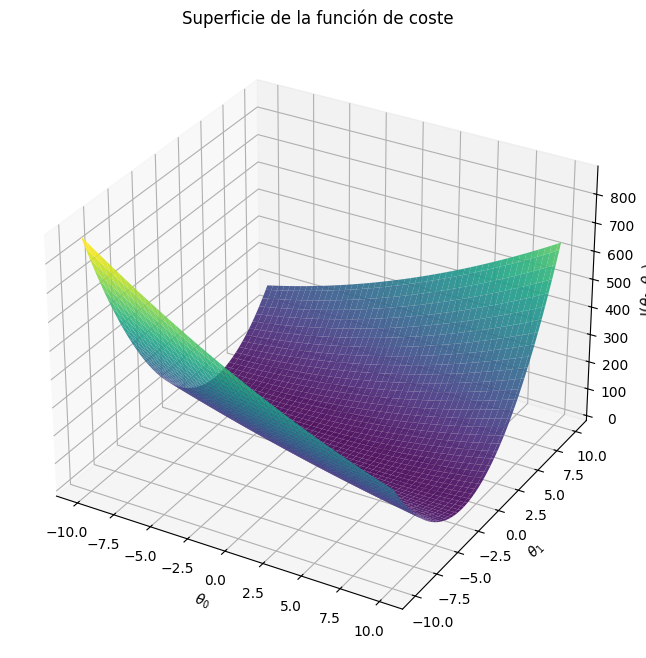

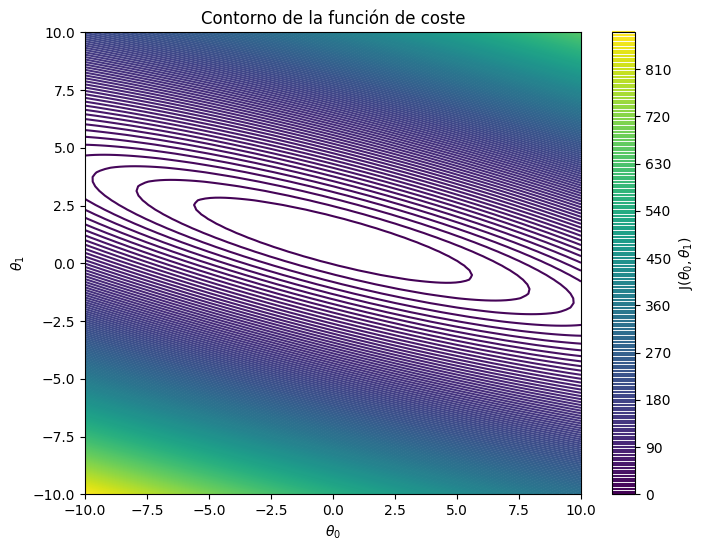

In [8]:
# Superficie de la función de costo 

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0, T1, J_vals, cmap='viridis', alpha=0.9)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel('J($\\theta_0, \\theta_1$)')
ax.set_title('Superficie de la función de coste')
plt.show()

# Mapa de contorno de la función de costo 

plt.figure(figsize=(8,6))
plt.contour(T0, T1, J_vals, levels=200, cmap='viridis', linestyles='solid')
plt.colorbar(label='J($\\theta_0, \\theta_1$)')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('Contorno de la función de coste')
plt.show()


5. Encontrar la expresión teórica para la función de coste en el caso 1D y 2D.


\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( (\theta_0 + \theta_1 x^{(i)})- y^{(i)})^2
\end{equation}

## Gradiente Descendente


Para determinar el mínimo,  a través del gradiente descendente puede ser aplicada el siguiente algoritmo:

- Proponer un número aleatorios inicial $\omega_i$
- Para descender al mínimo de la función, encontremos un  valor para el cual
el deriva de la función descenciende, asi:
\begin{equation}
\omega_{i+1} = \omega_{i} - \alpha \frac{\mathrm{d}f(\omega_i)}{\mathrm{d}\omega}
\end{equation}

donde, $\alpha$ es conocido como la tasa de aprendizaje del algoritmo.

- Evaluar $f(\omega_{i+1})$

- Iterar hasta encontrar el mínimo de la función

6. Construya un algoritmo en el que emplee el gradiente descente para determinar el minimo de una función, determine el mínimo con una error epsilon de  1E-4, pruebe su algoritmo para $f(x)= (x-4)^2$ y al menos 3 valores de $\alpha$

In [662]:
def grad_descent(w0, func, alpha, h=1e-6, iters=10000, tol=1e-9):
    w = float(w0)

    for _ in range(iters):
        # Derivada 
        deriv = (func(w + h) - func(w)) / (h)

        # Actualización de w
        w_new = w - alpha * deriv

        # Criterio de parada --> Recomendado por ChatGPT 
        # El algoritmo se detiene cuando los cambios en los parámetros son muy pequeños
        if abs(w_new - w) < tol:
            w = w_new
            break

        w = w_new

    return w, func(w)


w inicial: 8
w óptimo encontrado: 3.999999548750641
f(w_opt): 2.036259841895736e-13


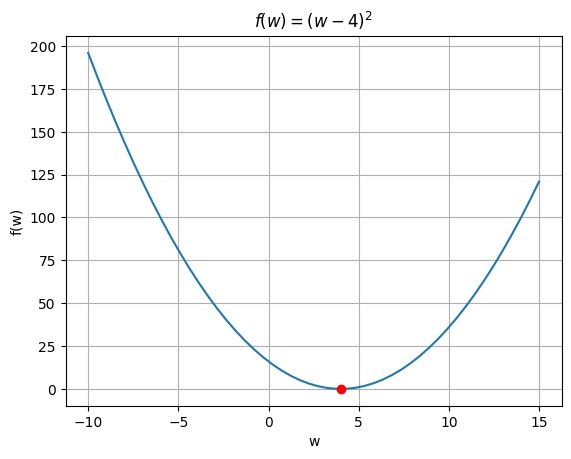

In [663]:
f = lambda w: (w - 4)**2
w=np.linspace(-10,15)

w0 = np.random.randint(-10, 15)  # Número aleatorio 
w_opt, f_opt = grad_descent(w0, f, alpha=0.01)
print("w inicial:", w0)
print("w óptimo encontrado:", w_opt)
print("f(w_opt):", f_opt)

plt.title(f'$f(w)=(w-4)^2$')
plt.plot(w,f(w))
plt.plot(w_opt,f(w_opt), 'ro')
plt.xlabel('w')
plt.ylabel('f(w)')
plt.grid()


7. Para responder este punto puede consultar la siguiente  página y seguir el video [Ejemplo guia: dotcsv](https://www.youtube.com/watch?v=-_A_AAxqzCg):

Encontrar el mínimo de la siguiente función a través del metodo del gradiente descendente https://en.wikipedia.org/wiki/Gradient_descent:


\begin{equation}
F(x,y) = \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y)
\end{equation}

  -  Para ello realice una gráfica de la función en 3D, y un mapa de contorno de la función.
  - Determine el valor mínimo de la función con el metodo del gradiente descendente.

In [664]:
# Para el desarollo del punto 7 seguí el video sugerido :)

func = lambda th: np.sin((1/2)*th[0]**2 - (1/4)*th[1]**2 + 3) * np.cos(2*th[0] + 1 - np.exp(th[1]))
func([2,3])

-0.3100866828910054

In [665]:
res = 1000 # Número de puntos (resolución) que se usarán en cada eje.
_X = np.linspace(-2, 2, res) # Crea un vector de res valores equiespaciados entre -2 y 2 para el eje X.
_Y = np.linspace(-2, 2, res) # Crea un vector de res valores equiespaciados entre -2 y 2 para el eje Y.

_Z = np.zeros((res, res)) # Crea una matriz de ceros de tamaño (res x res) donde se almacenarán
# los valores de la función f(x, y) evaluada en cada punto de la malla.

# Evaluación punto a punto de la función 
for ix, x in enumerate(_X):     # Recorre cada valor del eje X
    for iy, y in enumerate(_Y): # Recorre cada valor del eje Y
        _Z[iy, ix] = func([x, y])
        # Evalúa la función 'func' en el punto (x, y)
        # y guarda el resultado en la posición correspondiente de _Z.
        # La convención [iy, ix] asegura que la primera dimensión de _Z
        # corresponda al eje Y y la segunda al eje X.

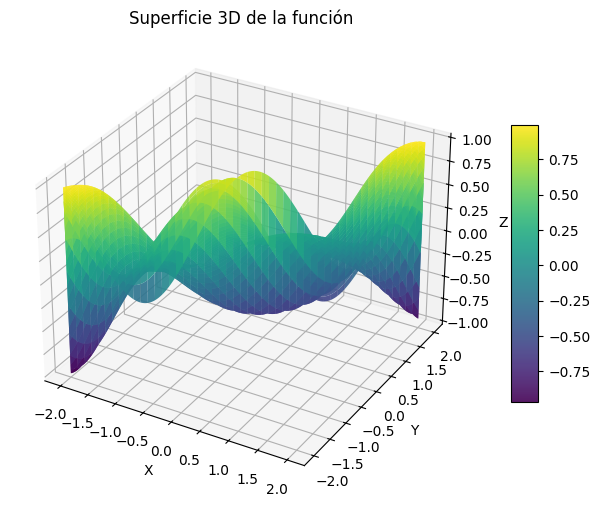

In [666]:
# Gráfico 3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(_X, _Y, _Z, cmap='viridis', alpha=0.9)
fig.colorbar(surf, ax=ax, shrink=0.6, aspect=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Superficie 3D de la función')

plt.show()

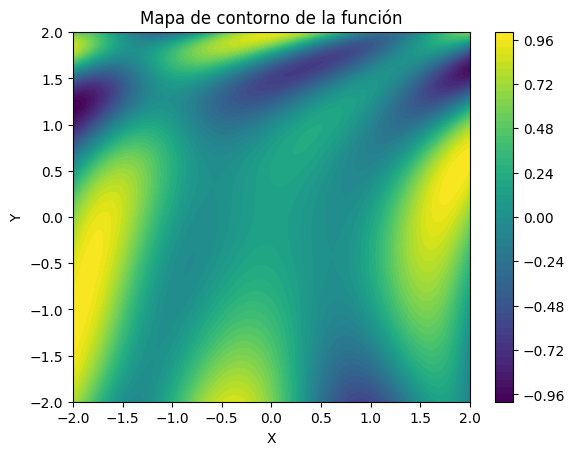

In [667]:
# Mapa de contorno

plt.contourf(_X, _Y, _Z, levels=50, cmap='viridis')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Mapa de contorno de la función')
plt.show()

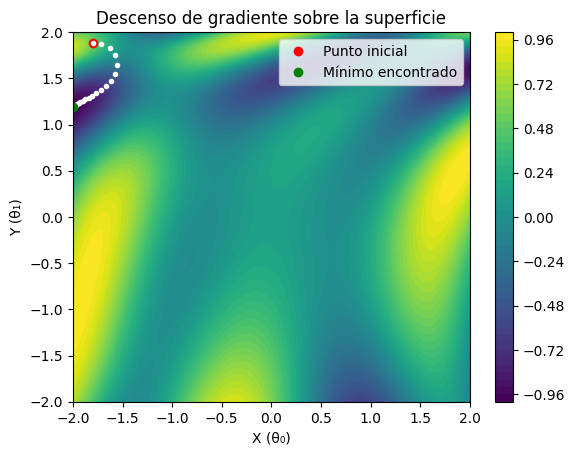

El valor mínimo de la función es : -0.9970341803101385


In [668]:
# Genera un punto aleatorio sobre la superficie (inicio del descenso de gradiente)
Theta = np.random.rand(2) * 4 - 2  
# np.random.rand(2) genera dos números aleatorios en [0,1)
# al multiplicar por 4 y restar 2 los llevamos al rango [-2, 2]
# Representa (θ₀, θ₁) iniciales, o coordenadas X, Y en la superficie

_T = np.copy(Theta)  # copia de Theta, usada para calcular derivadas
h = 1e-6            # paso pequeño para el cálculo numérico de derivadas (diferencias finitas)
lr = 0.001           # tasa de aprendizaje (learning rate)
grad = np.zeros(2)   # vector para guardar los gradientes parciales dJ/dθ₀ y dJ/dθ₁

# Mapa de contorno de la función 
plt.contourf(_X, _Y, _Z, levels=50, cmap='viridis')
plt.colorbar()
plt.plot(Theta[0], Theta[1], 'ro', label='Punto inicial')  # marca el punto inicial en rojo

# Bucle principal de descenso de gradiente 
for _ in range(1000):  # 1000 iteraciones de actualización
    # Calcular gradiente numérico (derivadas parciales)
    for it, th in enumerate(Theta):
        _T = np.copy(Theta)       # copia del vector actual
        _T[it] = _T[it] + h       # modifica una coordenada (θ₀ o θ₁) en +h
        deriv = (func(_T) - func(Theta)) / h  # derivada numérica: [f(x+h) - f(x)] / h
        grad[it] = deriv          # guarda el gradiente parcial calculado

    # Actualiza los parámetros siguiendo la dirección contraria al gradiente
    Theta = Theta - lr * grad

    # Cada 50 iteraciones, marca el progreso en el gráfico
    if _ % 50 == 0:
        plt.plot(Theta[0], Theta[1], '.', color='white')

# Marca el punto final (mínimo encontrado) 
plt.plot(Theta[0], Theta[1], 'go', label='Mínimo encontrado')
plt.legend()
plt.title('Descenso de gradiente sobre la superficie')
plt.xlabel('X (θ₀)')
plt.ylabel('Y (θ₁)')
plt.show()

# Imprime el valor mínimo estimado de la función
print(f'El valor mínimo de la función es : {func([Theta[0], Theta[1]])}')


# Modelo de *machine learning*: Solución general

Un modelo general para solucionar un problema de machinine learning puede ser estructurado como sigue:


a. Eliger el modelo a emplear:
\begin{equation}
h(X,\Theta)
\end{equation}

- En el caso de una regresion lineal tenemos que $h(X,\Theta=(\theta_0, \theta_1))$:

    \begin{equation}
    h(X) = (\theta_0 + \theta_1 X)
    \end{equation}


b. Eligir la funcion de coste :
-  Metrica Ecuclidiana:
\begin{equation}
J(\Theta)=\frac{1}{2m} \sum_{i=1}^m ( h_{\theta} (X^{(i)})-y^{(i)})^2
\end{equation}
- [Lista de funciones de coste que pueden ser empleadas](https://jmlb.github.io/flashcards/2018/04/21/list_cost_functions_fo_neuralnets/)


c. Aplicar el gradiente descendente iterativamente, hasta encontrar el minimo:  

\begin{equation}
\Delta \vec{\Theta} =  - \alpha \nabla J(\Theta)
\end{equation}



- En el caso de una regresion lineal tenemos que $h(X,\Theta=(\theta_0, \theta_1))$:


\begin{equation}
\theta_0 := \theta_0 - \alpha \frac{\partial J}{\partial \theta_0}
\end{equation}

\begin{equation}
\theta_1 := \theta_1 - \alpha \frac{\partial J}{\partial \theta_1}
\end{equation}

8. Empleando los siguientes datos :

```
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
```

y las herramientas desarrolladas en los apartados anteriores,
construya un algorítmo que permita determinar una regresión lineal.

In [669]:
X=np.linspace(0,1,100)
Y=0.2+0.2*X+0.02*np.random.random(100) 

In [670]:
data=pd.DataFrame({'X':X, 'Y':Y })
data

,X,Y
0,0.000000,0.207236
1,0.010101,0.202137
2,0.020202,0.209646
3,0.030303,0.223116
4,0.040404,0.213889
...,...,...
95,0.959596,0.404250
96,0.969697,0.404584
97,0.979798,0.411324
98,0.989899,0.410707


In [671]:
# Modelo 
def h(theta_0, theta_1, X):
    return theta_0 + theta_1 * X

# Función de costo 
def J(theta_0, theta_1, X, Y):
    m = len(X)
    costo = (1/(2*m)) * np.sum((theta_0 + theta_1 * X - Y) ** 2)
    return costo

# Gradiente descendente para dos parámetros
def grad_descent_2D(theta0_init, theta1_init, X, Y, alpha=0.01, iters=1000, tol=1e-9):
    theta_0 = theta0_init
    theta_1 = theta1_init
    m = len(X)

    for i in range(iters):
        # Gradientes parciales
        dtheta0 = (1/m) * np.sum(theta_0 + theta_1 * X - Y)
        dtheta1 = (1/m) * np.sum((theta_0 + theta_1 * X - Y) * X)

        # Actualización 
        new_theta_0 = theta_0 - alpha * dtheta0
        new_theta_1 = theta_1 - alpha * dtheta1

        # Criterio de parada
        if abs(new_theta_0 - theta_0) < tol and abs(new_theta_1 - theta_1) < tol:
            break

        theta_0, theta_1 = new_theta_0, new_theta_1

    # Costo final
    final_cost = J(theta_0, theta_1, X, Y)

    return theta_0, theta_1, final_cost



In [672]:
# Inicialización
theta0_init = np.random.randn()
theta1_init = np.random.randn()

# Llamar al gradiente descendente
t0_opt, t1_opt, costo_final = grad_descent_2D(theta0_init, theta1_init, data['X'], data['Y'], alpha=0.01, iters=10000)

print(f"θ₀ óptimo = {t0_opt:.6f}")
print(f"θ₁ óptimo = {t1_opt:.6f}")
print(f"h(x)={t0_opt:.6f}+{t1_opt:.6f}*X")


θ₀ óptimo = 0.209207
θ₁ óptimo = 0.201797
h(x)=0.209207+0.201797*X


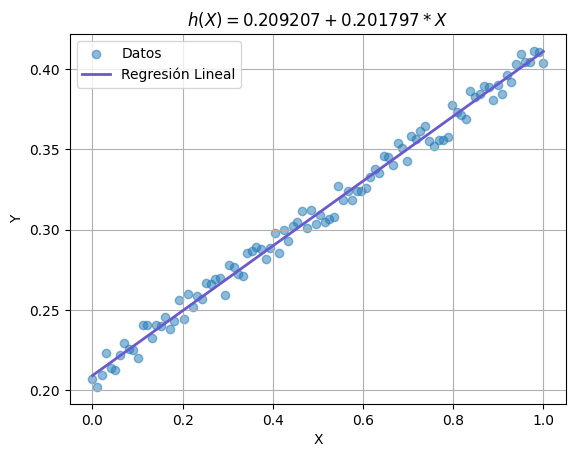

In [673]:
plt.title(f'$h(X)={t0_opt:.6f}+{t1_opt:.6f}*X$')
plt.scatter(data['X'], data['Y'], label='Datos', alpha=0.5)
plt.plot(data['X'], h(t0_opt,t1_opt, data['X']), label='Regresión Lineal',color='slateblue', linewidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()


9. Compare su resultado empleando la libreria linearRegresion() de sklearn.

In [ ]:
# Con Sklearn

X = X.reshape(-1, 1)

modelo = LinearRegression()
modelo.fit(X, Y)

theta_0 = modelo.intercept_     # intercepto
theta_1 = modelo.coef_[0]       # pendiente

print(f"θ₀ = {theta_0:.6f}")
print(f"θ₁ = {theta_1:.6f}")



θ₀ = 0.209773
θ₁ = 0.200741


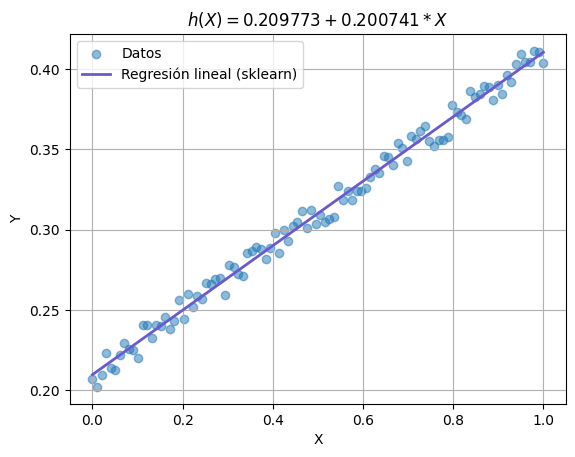

In [675]:
Y_pred = modelo.predict(X)

plt.scatter(X, Y, label='Datos', alpha=0.5)
plt.plot(X, Y_pred, label='Regresión lineal (sklearn)', color='slateblue', linewidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'$h(X)={theta_0:.6f}+{theta_1:.6f}*X$')
plt.legend()
plt.grid()
plt.show()


In [676]:
r2 = modelo.score(X, Y)
print(f"R² = {r2:.4f}")


R² = 0.9908


Como se esperaba, por ambos métodos los resultados son practicamente iguales. 